## 深入理解xgboost十三

### 特征重要性

In [1]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import pandas as pd

import xgboost as xgb

In [2]:
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [4]:
# 生成模型
model = xgb.XGBClassifier(max_depth=6, learning_rate=0.1)
model.fit(X=X_train, y=y_train, eval_set=[(X_train, y_train), (X_test, y_test)])

[0]	validation_0-logloss:0.60594	validation_1-logloss:0.61639
[1]	validation_0-logloss:0.53422	validation_1-logloss:0.55362
[2]	validation_0-logloss:0.47394	validation_1-logloss:0.50049
[3]	validation_0-logloss:0.42265	validation_1-logloss:0.45501
[4]	validation_0-logloss:0.37862	validation_1-logloss:0.41682
[5]	validation_0-logloss:0.33972	validation_1-logloss:0.38017
[6]	validation_0-logloss:0.30625	validation_1-logloss:0.35091
[7]	validation_0-logloss:0.27646	validation_1-logloss:0.32244
[8]	validation_0-logloss:0.25069	validation_1-logloss:0.30262
[9]	validation_0-logloss:0.22759	validation_1-logloss:0.28135
[10]	validation_0-logloss:0.20748	validation_1-logloss:0.26679
[11]	validation_0-logloss:0.18936	validation_1-logloss:0.25174
[12]	validation_0-logloss:0.17325	validation_1-logloss:0.23866
[13]	validation_0-logloss:0.15915	validation_1-logloss:0.22750
[14]	validation_0-logloss:0.14593	validation_1-logloss:0.21555
[15]	validation_0-logloss:0.13443	validation_1-logloss:0.20662
[1

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [5]:
booster = model.get_booster()

In [6]:
# 特征重要性
importance = booster.get_fscore()
importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)
importance

[('f21', 63.0),
 ('f23', 59.0),
 ('f27', 54.0),
 ('f13', 39.0),
 ('f7', 32.0),
 ('f1', 31.0),
 ('f26', 31.0),
 ('f22', 30.0),
 ('f4', 23.0),
 ('f15', 19.0),
 ('f24', 19.0),
 ('f20', 16.0),
 ('f28', 13.0),
 ('f6', 11.0),
 ('f17', 10.0),
 ('f29', 10.0),
 ('f12', 6.0),
 ('f10', 5.0),
 ('f18', 5.0),
 ('f19', 5.0),
 ('f0', 4.0),
 ('f9', 4.0),
 ('f16', 4.0),
 ('f11', 3.0),
 ('f25', 3.0),
 ('f5', 1.0),
 ('f8', 1.0),
 ('f14', 1.0)]

In [7]:
df = pd.DataFrame(importance, columns=["feature", "fscore"])
df

,feature,fscore
0,f21,63.0
1,f23,59.0
2,f27,54.0
3,f13,39.0
4,f7,32.0
5,f1,31.0
6,f26,31.0
7,f22,30.0
8,f4,23.0
9,f15,19.0


In [8]:
df["fscore"] = df["fscore"] / df["fscore"].sum()
df

,feature,fscore
0,f21,0.125498
1,f23,0.117530
2,f27,0.107570
3,f13,0.077689
4,f7,0.063745
5,f1,0.061753
6,f26,0.061753
7,f22,0.059761
8,f4,0.045817
9,f15,0.037849


In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

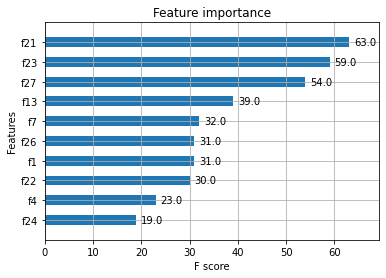

In [12]:
xgb.plot_importance(booster, height=0.5, max_num_features=10)